<a href="https://colab.research.google.com/github/Ritika2910/Customer_Segmentation-Using-Machine-Learning/blob/main/DBSCAN_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
data=pd.read_csv("Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select numerical columns for correlation
numerical_data = data.select_dtypes(include=np.number)
numerical_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0, 0.5, 'Count')

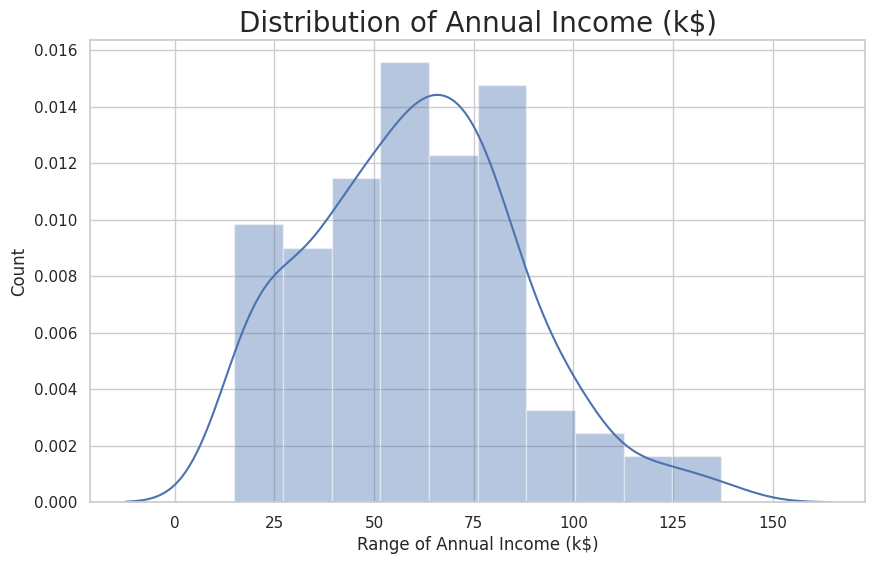

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

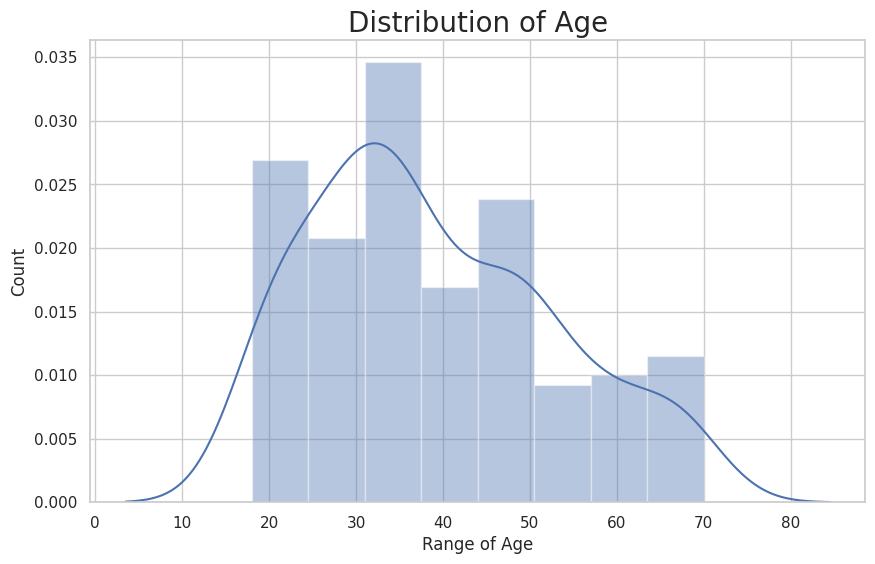

In [ ]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

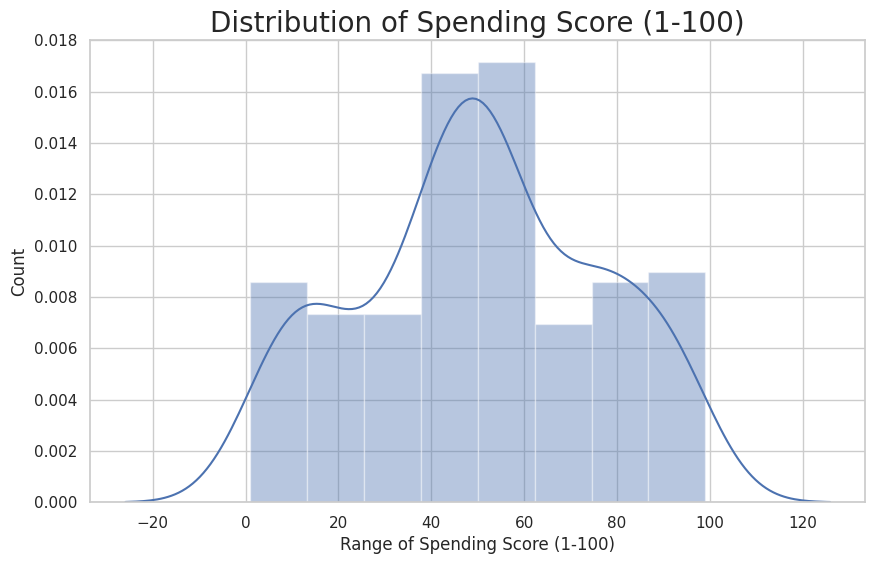

In [ ]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

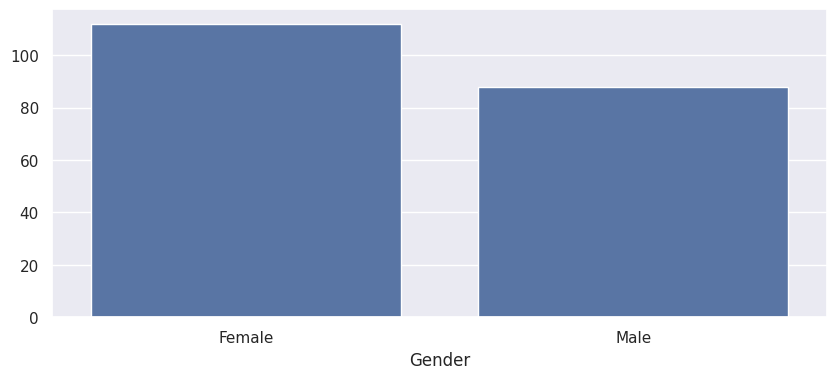

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [ ]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


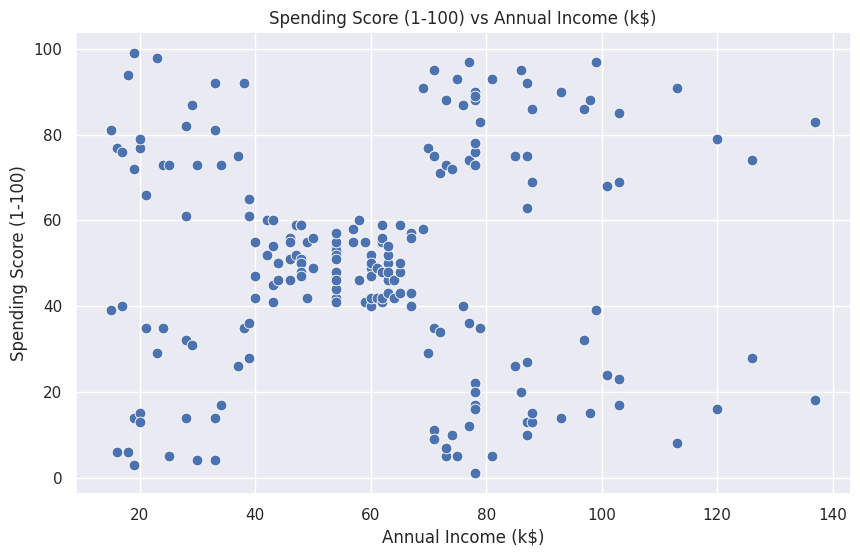

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

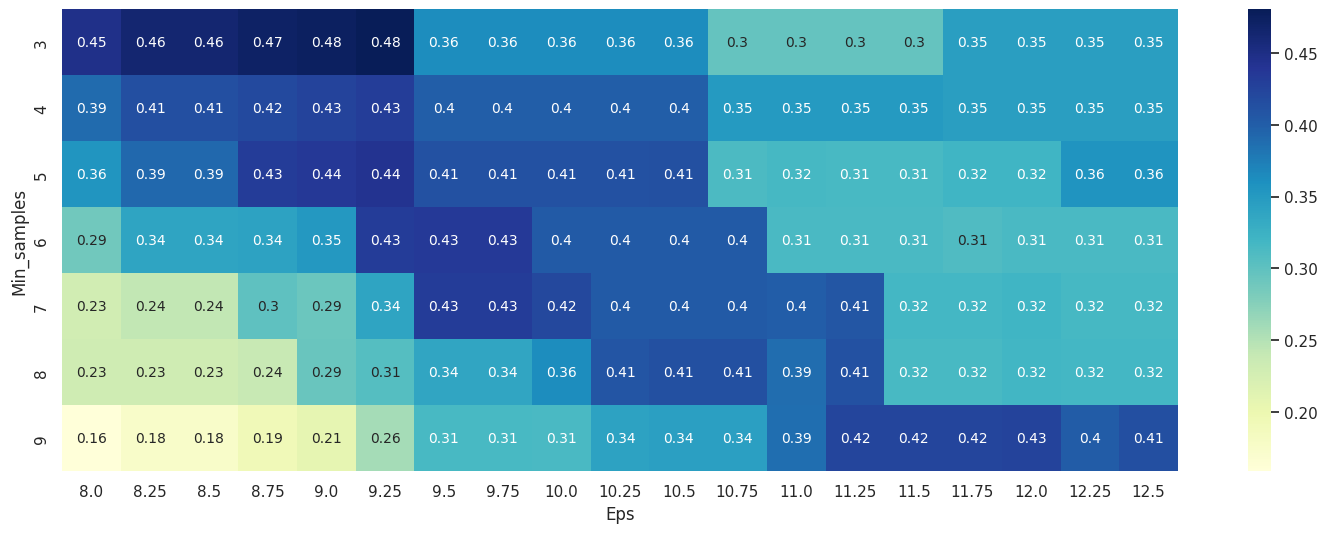

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=9).fit(X)
DBSCAN_clustered = df1.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
#Checking sizes of clusters.

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,17
0,112
1,12
2,33
3,26


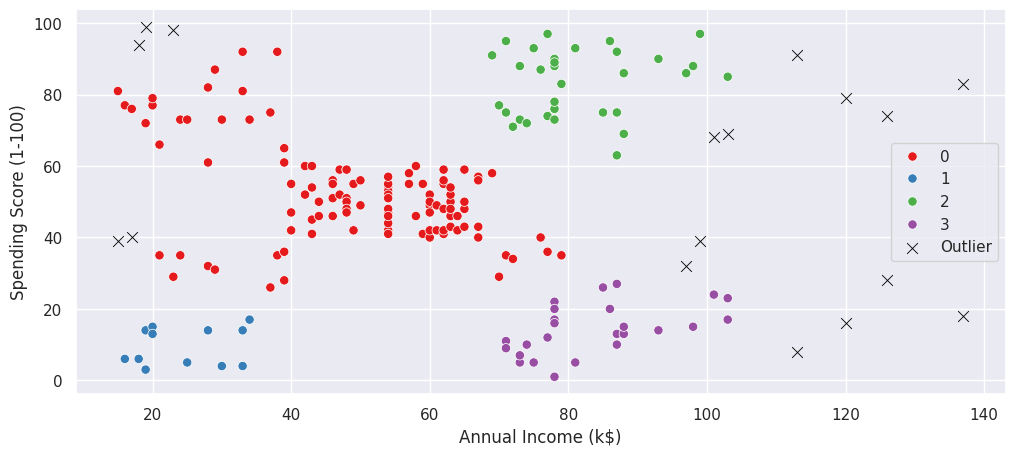

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))  # Create a subplot

# Plot of non-outlier points
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=ax, palette='Set1', legend='full', s=45)

# Plot of outlier points with a different color and label
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1],
                color='black', marker='x', s=60, label='Outlier', ax=ax)

plt.show()

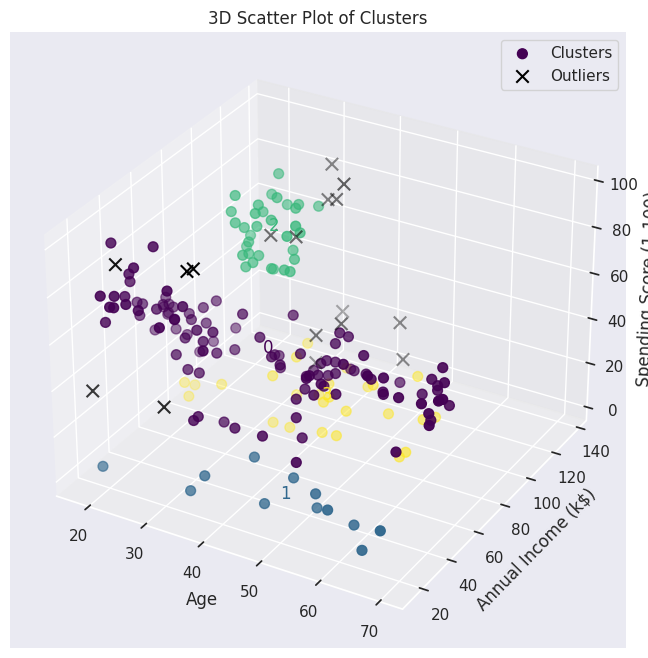

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels (excluding outliers)
unique_clusters = np.unique(DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Cluster'])

# Scatter plot for non-outlier points with cluster labels and colors
scatter = ax.scatter(DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Age'],
           DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Annual Income (k$)'],
           DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Spending Score (1-100)'],
           c=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Cluster'],
           cmap='viridis', s=50, label='Clusters')

# Scatter plot for outlier points
ax.scatter(DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]['Age'],
           DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]['Annual Income (k$)'],
           DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]['Spending Score (1-100)'],
           c='black', marker='x', s=80, label='Outliers')

# Add cluster labels with representative colors
for cluster in unique_clusters:
    color = scatter.to_rgba(cluster)  # Get color for the cluster
    ax.text(DBSCAN_clustered[DBSCAN_clustered['Cluster'] == cluster]['Age'].mean(),
            DBSCAN_clustered[DBSCAN_clustered['Cluster'] == cluster]['Annual Income (k$)'].mean(),
            DBSCAN_clustered[DBSCAN_clustered['Cluster'] == cluster]['Spending Score (1-100)'].mean(),
            s=str(cluster), color=color, fontsize=12)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()

plt.show()